In [1]:
import owlready2 as owlr
import pandas as pd
from rdflib import URIRef, Literal, Graph
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

from collections import Counter
import uuid

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))


    
    
    
    
import networkx as nx


import loader

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
raw_world = owlr.World(filename='raw_world.sqlite3')
rawdms = raw_world.get_ontology("datamodels_rdf.owl").load()
onto = rawdms
with onto:
    owlr.sync_reasoner(raw_world)

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpcsqndhrt
* Owlready2 * HermiT took 0.7251420021057129 seconds
* Owlready * Reparenting datamodels_rdf.IdentityClassParentModel: {datamodels_rdf.IdentityParent, owl.ObjectProperty} => {datamodels_rdf.IdentityParent}
* Owlready * Reparenting datamodels_rdf.ModelDomainContainsModel: {datamodels_rdf.HierarchicalRelations, owl.ObjectProperty} => {datamodels_rdf.HierarchicalRelations}
* Owlready * Reparenting datamodels_rdf.ClassHasAttribute: {datamodels_rdf.HierarchicalRelations, owl.ObjectProperty} => {datamodels_rdf.HierarchicalRelations}
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but not listed)


In [3]:
onto_dataproperties = list(onto.data_properties())
onto_individuals = list (onto.individuals())
individuals = [(i, i.is_a.first()) for i in onto_individuals + onto_dataproperties]
serializations = [i[0] for i in individuals if i[1] == onto.Serialization]

serialization_mappings={}
for s in serializations:
    print(s)

    mappings = [m for m in s.SerializationContainsMapping] 
    serialization_mappings[s.name]=mappings
    # Danger!! For multiple mappings, this fails!
    
serialization_mappings

datamodels_rdf.EntityAttributeRecord
datamodels_rdf.RelationshipRecord


{'EntityAttributeRecord': [datamodels_rdf.AttributeMapping,
  datamodels_rdf.ClassMapping,
  datamodels_rdf.DomainMapping,
  datamodels_rdf.ModelMapping,
  datamodels_rdf.hasAttributeMapping,
  datamodels_rdf.hasClassMapping,
  datamodels_rdf.hasDataTypeMapping,
  datamodels_rdf.hasModelMapping,
  datamodels_rdf.hasModelTypeMapping],
 'RelationshipRecord': [datamodels_rdf.DomainMapping,
  datamodels_rdf.ModelMapping,
  datamodels_rdf.RelationshipMapping,
  datamodels_rdf.hasModelTypeMapping,
  datamodels_rdf.hasRelationshipDomainMapping,
  datamodels_rdf.hasRelationshipFromCardinalityMapping,
  datamodels_rdf.hasRelationshipFromOptionalityMapping,
  datamodels_rdf.hasRelationshipKeyFromMapping,
  datamodels_rdf.hasRelationshipKeyToMapping,
  datamodels_rdf.hasRelationshipMapping,
  datamodels_rdf.hasRelationshipRangeMapping,
  datamodels_rdf.hasRelationshipToCardinalityMapping,
  datamodels_rdf.hasRelationshipToOptionalityMapping]}

In [4]:
mapped_things = [(c,c.MappingKey,"class") for c in onto.classes() if len(c.MappingKey) > 0] + \
                [(p, p.MappingKey,"data") for p in onto.data_properties() if len(p.MappingKey) > 0] + \
                [(p, p.MappingKey,"object") for p in onto.object_properties() if len(p.MappingKey) > 0] 
mappable_things = {vv:k for k,v,t in mapped_things for vv in v}
mappable_things_ext = {vv:(k,t) for k,v,t in mapped_things for vv in v}
assert all([v==1 for v in Counter([b for c in mapped_things for b in c[1]]).values()])
#del mapped_things
#mappable_things
mappable_things_ext

row_node_class = [c for c in onto.classes() if c.name == 'RowNode']
row_node_participant = [p for p in onto.properties() if p.name == 'RowNodeParticipant']
row_node_class, row_node_participant
mappable_things_ext

{'Class': (datamodels_rdf.Class, 'class'),
 'Attribute': (datamodels_rdf.Attribute, 'class'),
 'Relationship': (datamodels_rdf.Relationship, 'class'),
 'DataModel': (datamodels_rdf.DataModel, 'class'),
 'Domain': (datamodels_rdf.ModelDomain, 'class'),
 'isRowNode': (datamodels_rdf.RowNode, 'class'),
 'Serialization': (datamodels_rdf.Serialization, 'class'),
 'Mapping': (datamodels_rdf.Mapping, 'class'),
 'Context': (datamodels_rdf.Context, 'class'),
 'hasCardinality': (datamodels_rdf.Cardinality, 'data'),
 'hasOptionality': (datamodels_rdf.Optionality, 'data'),
 'DataType': (datamodels_rdf.DataType, 'data'),
 'hasDataType': (datamodels_rdf.DataType, 'data'),
 'ModelType': (datamodels_rdf.ModelType, 'data'),
 'hasModelType': (datamodels_rdf.ModelType, 'data'),
 'hasModelType_obsolete': (datamodels_rdf.ModelTypeCode, 'data'),
 'UniqueIdentifier': (datamodels_rdf.UniqueIdentifier, 'data'),
 'hasAttribute': (datamodels_rdf.ClassHasAttribute, 'object'),
 'hasRelationshipDomain': (datamodels

In [5]:
mapping_data = {}
for s in serializations:
    mapping_data[s.name]={}
    mappings = [m for m in s.SerializationContainsMapping] 
    for m in mappings:
        mapping_data[s.name][m.name]={}
        for p in m.get_properties():
            mapping_data[s.name][m.name][p.name]=p[m].first()
mapping_data

{'EntityAttributeRecord': {'AttributeMapping': {'MappingRange': 'Attribute',
   'SerializationLabel': 'Attribute',
   'MappingLabel': 'Attribute',
   'MappingSubType': 'Entity'},
  'ClassMapping': {'MappingRange': 'Class',
   'SerializationLabel': 'Entity',
   'MappingLabel': 'Class',
   'MappingSubType': 'Entity'},
  'DomainMapping': {'MappingRange': 'Domain',
   'SerializationLabel': 'Business Domain',
   'MappingLabel': 'Domain',
   'MappingSubType': 'Entity'},
  'ModelMapping': {'MappingRange': 'DataModel',
   'SerializationLabel': 'Model',
   'MappingLabel': 'DataModel',
   'MappingSubType': 'Entity'},
  'hasAttributeMapping': {'SerializationLabel': 'Attribute',
   'MappingLabel': 'hasAttribute',
   'MappingRange': 'Attribute',
   'MappingDomain': 'Class',
   'MappingSubType': 'Property'},
  'hasClassMapping': {'SerializationLabel': 'Entity',
   'MappingLabel': 'hasClass',
   'MappingRange': 'Class',
   'MappingDomain': 'DataModel',
   'MappingSubType': 'Property'},
  'hasDataType

In [6]:
data_rows = [{ "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "PersonID", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FirstName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FamilyName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfBirth", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfDeath", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 1", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 2", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 3", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Postal Code", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Product", 
             "Attribute" : "Coverage Type", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Policy ID", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Start Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "End Date", 
             "DataType" : "string"},
             
            ]

pd.DataFrame(data_rows)

,Business Domain,Model,ModelType,Entity,Attribute,DataType
0,Core,Principal Interactions,Conceptual,Person,PersonID,string
1,Core,Principal Interactions,Conceptual,Person,FirstName,string
2,Core,Principal Interactions,Conceptual,Person,FamilyName,string
3,Core,Principal Interactions,Conceptual,Person,DateOfBirth,date
4,Core,Principal Interactions,Conceptual,Person,DateOfDeath,date
5,Core,Principal Interactions,Conceptual,Address,Address Line 1,string
6,Core,Principal Interactions,Conceptual,Address,Address Line 2,string
7,Core,Principal Interactions,Conceptual,Address,Address Line 3,string
8,Core,Principal Interactions,Conceptual,Address,Postal Code,string
9,Core,Principal Interactions,Conceptual,Address,Country,string


In [7]:
staging_graph = Graph()

In [8]:
q="""SELECT distinct ?s ?o
WHERE

{
    {?s ?p ?o .
     ?h rdfs:subPropertyOf dm:HierarchicalRelations.
     BIND (dm:UniqueIdentifier as ?p)
     ?s dm:UniqueIdentifier ?o .
     FILTER NOT EXISTS {?s rdf:type dm:RowNode . }
     }
     
}
 
 """


for e,r in enumerate(data_rows):
    m_data = mapping_data['EntityAttributeRecord']
    row_graph_triples = loader.gen_temp_entity_triples_from_row(m_data, mappable_things_ext, "http://temp", r, row_id=f'row_{e}')
    row_graph=Graph()
    for t in row_graph_triples:
        row_graph.add(t)
    # connect additional context to row-graph
    row_graph.parse ("datamodels_rdf.owl", format='xml')
    dmns = Namespace(onto.base_iri)
    row_graph.bind('dm', dmns)
    row_graph.bind('rdfs', RDFS)
    namespace_d = {'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}
    unique_id_triples=loader.gen_unique_identity_triples(row_graph, namespace_d)
    for t in unique_id_triples:
        row_graph.add(t)
        
    #{dir(k):v for k,v in list(row_graph.query(q, initNs={'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}))}

    row_object_keys_d = {v.value:k.n3()[1:-1] for k,v in list(row_graph.query(q, initNs=namespace_d))}
    
    
    uri_replacements ={}
    for k,v in row_object_keys_d.items():
        print(k,v)
        target_keys = list(loader.search_on_key_value(staging_graph, namespace_d, "dm:UniqueIdentifier", k))
        row_keys = list(loader.search_on_key_value(row_graph, namespace_d, "dm:UniqueIdentifier", k))

        if len(target_keys)>0 and len(row_keys)>0:
            uri_replacements [row_keys[0][0]]=target_keys[0][0]
        else:
            uri_replacements [row_keys[0][0]]=row_keys[0][0]

    # Extract all the raw triples from row_graph
    # Pass them through the replacements dictionary and 
    # Load the converted ones into the staging_graph...
    stage_triples = []
    for s,p,o in row_graph_triples + unique_id_triples:
        stage_triples.append((uri_replacements.get(s,s), p, uri_replacements.get(o,o)))


    for t in stage_triples:
        staging_graph.add(t)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']]. datamodels_rdf.Attribute PersonID
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']]. datamodels_rdf.Class Person
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']]. datamodels_rdf.DataModel Principal Interactions
[(rdflib.term.Literal('Principal Interactions'), rdflib.term.Literal('Person')), (rdflib.term.Literal('Core'), rdflib.term.Literal('Principal Interactions')), (rdflib.term.Literal('Person'), rdflib.term.Literal('PersonID'))]
core.principal_interactions.person http://temp/ac48f71100bb4953bd2ccf1641121adc
core.principal_interactions http://temp/0a93f6e460b441db9e944d324dd07ab8
core http://temp/dadd0ede2ac54a789727f4c30e2ed0a1
core.principal_interactions.person.personid http://temp/ecad1f5c39f442069c392c9f0fde1f01
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']]. datamodels_rdf.Attribute FirstName
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'I

core.principal_interactions.address.country http://temp/ef1afe22b2fc4bec8b18e712b6e7df01
core http://temp/5e2e0dbc20a14e8b814a5c8878336fd1
core.principal_interactions.address http://temp/a7c207ca28c748d397e58548a32e5f80
core.principal_interactions http://temp/6f97d3e17e574a9aaa84148cdb906a1a
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']]. datamodels_rdf.Attribute Coverage Type
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']]. datamodels_rdf.Class Insurance Product
[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']]. datamodels_rdf.DataModel Principal Interactions
[(rdflib.term.Literal('Core'), rdflib.term.Literal('Principal Interactions')), (rdflib.term.Literal('Principal Interactions'), rdflib.term.Literal('Insurance Product')), (rdflib.term.Literal('Insurance Product'), rdflib.term.Literal('Coverage Type'))]
core.principal_interactions.insurance_product http://temp/0e91e84c1e854fd6bd85083cb97a9292
core http://temp/f763d52ea03

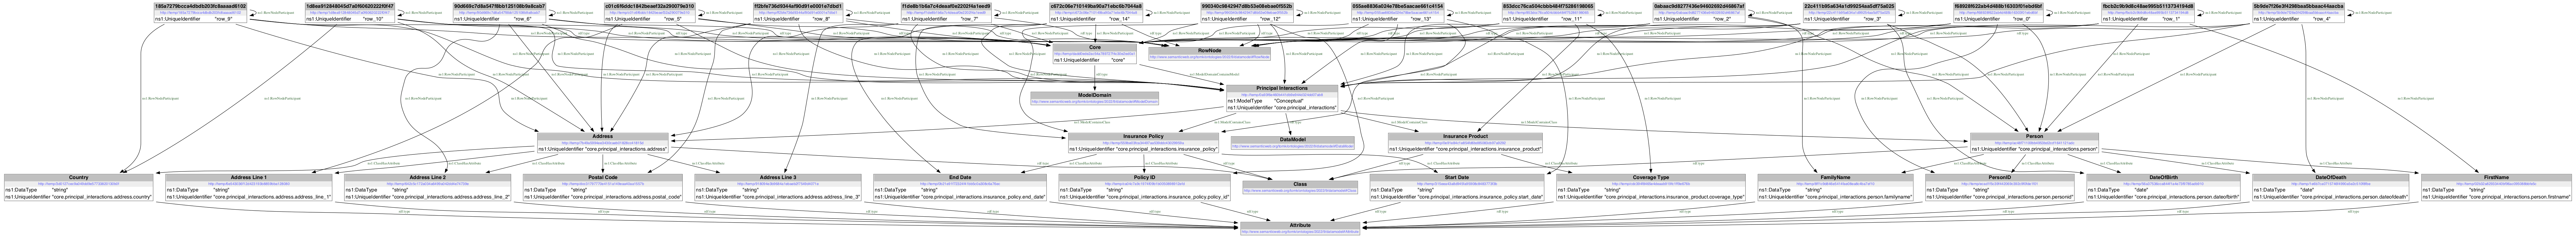

In [9]:
visualize(staging_graph)

In [10]:
# Now load up some relationships

data_rows = [{ "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Relationship" : "PersonHasPolicy", 
             "FromClass" : "Person", 
             "ToClass" : "Insurance Policy"}]

In [11]:
q="""SELECT distinct ?s ?o
WHERE

{
    {?s ?p ?o .
     ?h rdfs:subPropertyOf dm:HierarchicalRelations.
     BIND (dm:UniqueIdentifier as ?p)
     ?s dm:UniqueIdentifier ?o .
     FILTER NOT EXISTS {?s rdf:type dm:RowNode . }
     }
     
}
 
 """

serialization_name = "RelationshipRecord"

for e,r in enumerate(data_rows):
    m_data = mapping_data[serialization_name]
    row_graph_triples = loader.gen_temp_entity_triples_from_row(m_data, mappable_things_ext, "http://temp", r, row_id=f'row_{e}')
    row_graph=Graph()
    for t in row_graph_triples:
        row_graph.add(t)
    # connect additional context to row-graph
    row_graph.parse ("datamodels_rdf.owl", format='xml')
    dmns = Namespace(onto.base_iri)
    row_graph.bind('dm', dmns)
    row_graph.bind('rdfs', RDFS)
    namespace_d = {'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}
    unique_id_triples=loader.gen_unique_identity_triples(row_graph, namespace_d)
    for t in unique_id_triples:
        row_graph.add(t)
        
    #{dir(k):v for k,v in list(row_graph.query(q, initNs={'dm': dmns, 'rdfs' : RDFS, 'rdf' : RDF}))}

    row_object_keys_d = {v.value:k.n3()[1:-1] for k,v in list(row_graph.query(q, initNs=namespace_d))}
    
    
    uri_replacements ={}
    for k,v in row_object_keys_d.items():
        print(k,v)
        target_keys = list(loader.search_on_key_value(staging_graph, namespace_d, "dm:UniqueIdentifier", k))
        row_keys = list(loader.search_on_key_value(row_graph, namespace_d, "dm:UniqueIdentifier", k))

        if len(target_keys)>0 and len(row_keys)>0:
            uri_replacements [row_keys[0][0]]=target_keys[0][0]
        else:
            uri_replacements [row_keys[0][0]]=row_keys[0][0]

    # Extract all the raw triples from row_graph
    # Pass them through the replacements dictionary and 
    # Load the converted ones into the staging_graph...
    stage_triples = []
    for s,p,o in row_graph_triples + unique_id_triples:
        stage_triples.append((uri_replacements.get(s,s), p, uri_replacements.get(o,o)))


    for t in stage_triples:
        staging_graph.add(t)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']]. datamodels_rdf.Class Person


IndexError: list index out of range